In [1]:
# importing necessary libraries
import wbgapi as wb
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob
import re
import matplotlib.pyplot as plt
%matplotlib inline

# creating a list of country codes which will be used to pull data from worldbank data
country_codes = ["GBR","USA","BGD"]

In [3]:
# creating two indicator id lists which will be used to pull data from worldbank data
# Population growth (annual %) = SP.POP.GROW
# CO2 emissions (metric tons per capita) = EN.ATM.CO2E.PC
# Arable land (% of land area) = AG.LND.ARBL.ZS
# Forest area (% of land area) = AG.LND.FRST.ZS

indicator_ids_1 = ["SP.POP.GROW","EN.ATM.CO2E.PC"]
indicator_ids_2 = ["AG.LND.ARBL.ZS", "AG.LND.FRST.ZS"]


In [4]:
# fetch data from world bank

#df1 = wb.data.DataFrame(indicator_ids_1,country_codes,skipAggs=True, columns='economy' , mrv=5, columns='series', numericTimeKeys=True)
df1 = wb.data.DataFrame(indicator_ids_1,country_codes, range(2010, 2020, 2), skipAggs=True, columns='time', numericTimeKeys=True)
df2 = wb.data.DataFrame(indicator_ids_2,country_codes, range(2010, 2020, 2), skipAggs=True, columns='economy', numericTimeKeys=True)

df1.index.names = ['country', 'series']
df2.index.names = ['series', 'year']

# setting the series names to more understandables of 1st dataframe
df1 = df1.transpose()
arrays = [['BGD','BGD','GBR','GBR','USA','USA'], ['CO2 emissions','Population growth','CO2 emissions','Population growth','CO2 emissions','Population growth']]
df1.columns = pd.MultiIndex.from_arrays(arrays, names=('country', 'series'))
df1 = df1.transpose()

# setting the series names to more understandables of 2nd dataframe
df2 = df2.transpose()
arrays = [['Arable land','Arable land','Arable land','Arable land','Arable land','Forest area','Forest area','Forest area','Forest area','Forest area'], [2010, 2012, 2014, 2016, 2018, 2010, 2012, 2014, 2016, 2018]]
df2.columns = pd.MultiIndex.from_arrays(arrays, names=('series', 'year'))
df2 = df2.transpose()

display(df1)
display(df2)

2010       2012       2014       2016  \
country series                                                          
BGD     CO2 emissions       0.342740   0.384025   0.412899   0.466776   
        Population growth   1.124807   1.154006   1.142930   1.095288   
GBR     CO2 emissions       7.675926   7.332471   6.421598   5.774742   
        Population growth   0.783889   0.695353   0.736464   0.757874   
USA     CO2 emissions      17.434196  15.771145  16.026379  15.131747   
        Population growth   0.829617   0.733600   0.733362   0.724676   

                                2018  
country series                        
BGD     CO2 emissions       0.512837  
        Population growth   1.053570  
GBR     CO2 emissions       5.398708  
        Population growth   0.605929  
USA     CO2 emissions      15.240875  
        Population growth   0.526435

BGD        GBR        USA
series      year                                 
Arable land 2010  59.852501  24.676559  17.241638
            2012  58.922947  25.676849  16.945488
            2014  58.915265  25.765717  17.064845
            2016  59.646693  24.908075  17.184190
            2018  59.708842  24.956754  17.243857
Forest area 2010  14.506738  12.644153  33.749407
            2012  14.491551  12.802877  33.809533
            2014  14.476365  12.961600  33.869659
            2016  14.468772  13.057496  33.899723
            2018  14.468772  13.115364  33.866926

In [5]:
df1_1 = wb.data.DataFrame("SP.POP.GROW",country_codes, range(2010, 2020, 2), skipAggs=True, numericTimeKeys=True)
df1_2 = wb.data.DataFrame("EN.ATM.CO2E.PC",country_codes, range(2010, 2020, 2), skipAggs=True, numericTimeKeys=True)
display(df1_1)

,2010,2012,2014,2016,2018
economy,,,,,
BGD,1.124807,1.154006,1.142930,1.095288,1.053570
GBR,0.783889,0.695353,0.736464,0.757874,0.605929
USA,0.829617,0.733600,0.733362,0.724676,0.526435


array([<AxesSubplot:ylabel='2010'>, <AxesSubplot:ylabel='2012'>,
       <AxesSubplot:ylabel='2014'>, <AxesSubplot:ylabel='2016'>,
       <AxesSubplot:ylabel='2018'>], dtype=object)

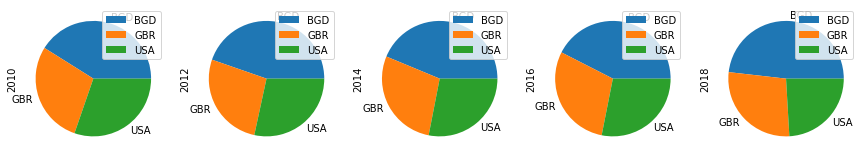

In [6]:
df1_1.plot(kind='pie', subplots=True, figsize=(15,10))


Text(0.5, 0, 'CO2 Emission (metric tons per capita)')

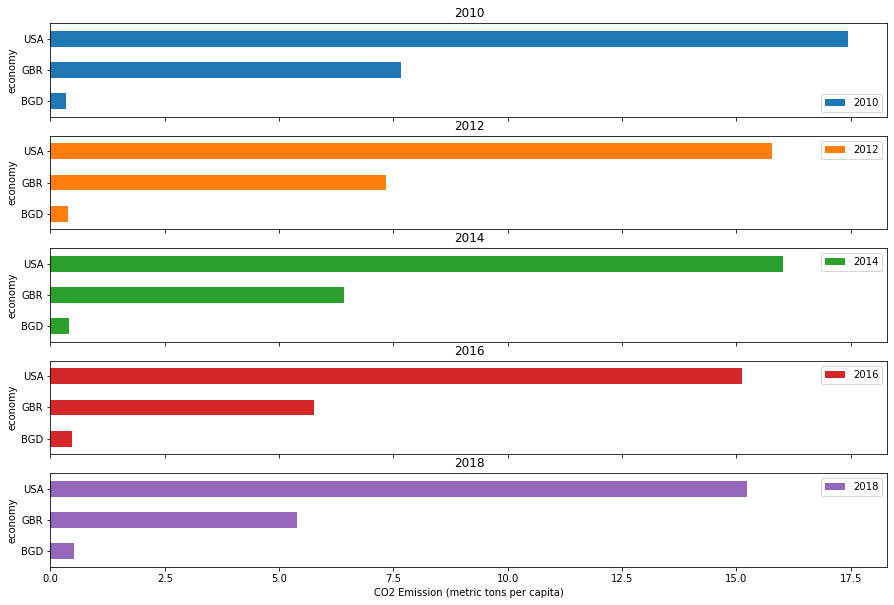

In [10]:
df1_2.plot(kind='barh', subplots=True, figsize=(15,10))
plt.xlabel('CO2 Emission (metric tons per capita)')
